# Monte Carlo Simulations

## Random Numbers and Monte Carlo Simulation

Many of the code examples in this book make use of pseudorandom number generation, often
coupled with the so-called Monte Carlo simulation method for obtaining numerical estimates. 
The phrase `Monte Carlo` associated with random number generation comes from the European province
in Monaco famous for its many casinos. 
We now overview the core ideas and principles of random number generation and Monte Carlo simulation.
The main player in this discussion is the `rand()` function. 
When used without input arguments, rand() generates a “random” number in the interval [0; 1]. Several questions can be asked. How
is it random? What does random within the interval [0; 1] really mean? How can it be used as an
aid for statistical and scientific computation? For this we discuss pseudorandom numbers in a bit
more generality.
The “random” numbers we generate using Python, as well as most “random” numbers used in any
other scientific computing platform, are actually pseudorandom. That is, they aren’t really random
but rather appear random. For their generation, there is some deterministic (non-random and well
defined) sequence, fxng, specified by 
$$ x_{n+1} = f(x_n, x_{n-1},\dots)$$
originating from some specified seed, $x_0$.
The mathematical function, $f()$ is often (but not always)
quite a complicated function, designed to yield desirable properties for the sequence fxng that make
it appear random. Among other properties we wish for the following to hold:

- Elements $x_i$ and $x_j$ for $i \neq j$ should appear statistically independent. That is, knowing the value of $x_i$ should not yield information about the value of $x_j$ .
- The distribution of fxng should appear uniform. That is, there shouldn’t be values (or ranges of values) where elements of fxng occur more frequently than others.
- The range covered by fxng should be well defined.
- The sequence should repeat itself as rarely as possible.


In [8]:
from random import random

In [10]:
random()

0.12280396662234327

In [11]:
a = random()
a

0.7765008021454447

In [14]:
[random(), random()]

[0.8597608736470094, 0.5251386589685444]

## Coin Flip 

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# coin flip def
# 0 -> Head
# 1 -> Tails

def coin_flip():
    return random.randint(0,1)

In [ ]:
coin_flip()

In [ ]:
def mc_flip(n):
    lista1 = []
    results = 0
    for i in range(n):
        flip_res = coin_flip()
        results = results + flip_res
        
        prob_value = results/(i+1)
        
        lista1.append(prob_value)
    return lista1, results/n


def Iter_plot(lista, yname="Probability"):
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.xlabel("Iterations")
    plt.ylabel(yname)
    plt.plot(lista)


In [ ]:
def example(n):
    l1,first = mc_flip(n)
    print("aprox prob: ", first)
    Iter_plot(l1)

In [ ]:
example(100)

In [ ]:
example(1000)

## PI 

In [1]:
zm = list(range(10))
zm

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
for x in ["abc",'sdasd','sdasdwd']:
    print(x)
    print(x+'sdasda')

abc
abcsdasda
sdasd
sdasdsdasda
sdasdwd
sdasdwdsdasda


In [5]:
nl = []
for x in zm:
    nl.append(x**2)

nl

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [6]:
x

9

In [7]:
[ el for el in zm if el%2==0 ]

[0, 2, 4, 6, 8]

In [17]:
N=10

[random.random() for _ in range(N)]

[0.34185814039546414,
 0.8800456883387737,
 0.5415940334910543,
 0.7001413501265731,
 0.052404433950134166,
 0.13743371278351424,
 0.8712621713975444,
 0.1375011264717081,
 0.23143063062001168,
 0.03620505561435816]

In [18]:
data = [[random.random(),random.random()] for _ in range(10)]

In [20]:
data

[[0.20607719000669078, 0.7088613460344504],
 [0.49731698053063644, 0.23402023732637767],
 [0.6130501495987567, 0.4349319337338228],
 [0.8991329309548125, 0.051548925798435286],
 [0.71561630285996, 0.5187899429670978],
 [0.38224597157013906, 0.15961048595893979],
 [0.906261605529663, 0.11669126993185841],
 [0.9064947990586171, 0.764220717061436],
 [0.7164425676918694, 0.3863114469186236],
 [0.4475340603266633, 0.520320888781984]]

In [21]:
data[3]

[0.8991329309548125, 0.051548925798435286]

In [22]:
data[1][0]**2+data[1][1]**2

0.30208965060240356

In [23]:
from numpy.linalg import norm

In [25]:
print(f"wektor {data[0]} , suma kwadratow = {data[0][0]**2+data[0][1]**2}, \n sqrt(sumy kwardratow)\
      = {np.sqrt(data[0][0]**2+data[0][1]**2)}")

wektor [0.20607719000669078, 0.7088613460344504] , suma kwadratow = 0.5449522161428266, 
 sqrt(sumy kwardratow)      = 0.7382087889905041


In [26]:
def dlugosc(x):
    return np.sqrt(x[0]**2+x[1]**2) 

In [27]:
dlugosc(data[1])

0.5496268284958473

In [28]:
[ dlugosc(x) for x in data ]

[0.7382087889905041,
 0.5496268284958473,
 0.7516623396875092,
 0.9006094154950659,
 0.8838833055572227,
 0.41423120356830734,
 0.9137433721431375,
 1.1856500854409862,
 0.8139573003673347,
 0.6863093780907727]

In [29]:
data = [[random.random(),random.random()] for _ in range(100000)]

In [30]:
normy = [norm(x) for x in data]

In [31]:
normy[:10]

[0.7058086896464574,
 1.059281390584013,
 0.9638082013764714,
 0.6253578482660748,
 0.4803442846309783,
 0.6696323970291219,
 0.7813567629243566,
 0.9322308585170149,
 0.5525657484753972,
 0.9161706217858715]

In [32]:
[x for x in normy if x<=1][:10]

[0.7058086896464574,
 0.9638082013764714,
 0.6253578482660748,
 0.4803442846309783,
 0.6696323970291219,
 0.7813567629243566,
 0.9322308585170149,
 0.5525657484753972,
 0.9161706217858715,
 0.8451603186068369]

In [33]:
normy[ normy<=1 ]

TypeError: '<=' not supported between instances of 'list' and 'int'

In [34]:
normy = np.array(normy)

In [35]:
normy[ normy<=1 ]

array([0.70580869, 0.9638082 , 0.62535785, ..., 0.36871959, 0.36313951,
       0.79604591])

In [36]:
len(normy[normy<=1])

78603

In [37]:
len(normy)

100000

In [38]:
PI = 4*(len(normy[normy<=1])/len(normy))
PI

3.14412

In [39]:
import math

In [42]:
in_ = 0
out_ = 0
pi_values = []
for i in range(5):
    for j in range(100000):
        x = random.randrange(-100,100)
        y = random.randrange(-100,100)
        if(x**2+y**2>100**2):
            out_ = out_ + 1
        else:
            in_ = in_ + 1
        pi = 4.0*in_/(in_+out_)
        pi_values.append(pi)
    print(pi_values[-1])

3.14072
3.13848
3.1400266666666665
3.13967
3.140848


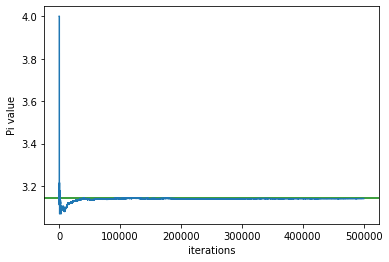

In [43]:
plt.axhline(y=math.pi, color='g', linestyle='-')
plt.plot(pi_values)
plt.xlabel("iterations")
plt.ylabel("Pi value")
plt.show()

### Programowanie obiektowe - Rzut kością

In [ ]:
from random import randint

class Die(object):
    """Pojedyncza kość do gry"""
    def __init__(self, num_sides = 6):
        """Kość to zazwyczaj sześcian"""
        self.num_sides = num_sides
    
    def roll(self):
        """Zwraca wartość 1 do liczby ścianek losowo"""
        return randint(1,self.num_sides)


# PROGRAM
die = Die()

results = []
for roll_num in range(100):
    result = die.roll()
    results.append(result)

print(results)   

In [ ]:
### Błądzenie losowe

In [ ]:
from random import choice
class RandomWalk(object):
    """generowanie błądzenia losowego"""
    def __init__(self, num_points=5000):
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        while len(self.x_values) < self.num_points:
            x_direction = choice([-1,1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction*x_distance

            y_direction = choice([-1,1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction*y_distance

            if x_step == 0 and y_step == 0:
                continue

            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step

            self.x_values.append(next_x)
            self.y_values.append(next_y)

In [ ]:
rw = RandomWalk()
rw.fill_walk()

plt.scatter(rw.x_values, rw.y_values, s=15)
plt.show()

In [ ]:
rw = RandomWalk()
rw.fill_walk()

point_number = list(range(rw.num_points))
plt.scatter(rw.x_values,rw.y_values, c=point_number, cmap=plt.cm.Blues, edgecolor='none', s=15)
plt.scatter(0,0,c='green', edgecolor='none',s=100)
plt.scatter(rw.x_values[-1],rw.y_values[-1], c='red',edgecolor='none', s=100)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.show()

In [ ]:
rw = RandomWalk(50000)
rw.fill_walk()

point_number = list(range(rw.num_points))
plt.scatter(rw.x_values,rw.y_values, c=point_number, cmap=plt.cm.Blues, edgecolor='none', s=1)
plt.scatter(0,0,c='green', edgecolor='none',s=100)
plt.scatter(rw.x_values[-1],rw.y_values[-1], c='red',edgecolor='none', s=100)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.show()